Octubre 2024

# Especialización en Inteligencia Artificial, Universidad Minuto de Dios
## Machine Learning NRC-407
Jose Guillermo Valle Pavas

Actividad Semana 4 - **Aprendizaje no supervisado**
___

## ***Seleccion del set de datos:***
Los cinco grandes rasgos de personalidad, también conocidos como el modelo de cinco factores (FFM) y el modelo OCEAN.

Archivo con la data: https://drive.google.com/file/d/1_SBbjrDkLL08CsJpfKgl7rMA3q4pF6AV/view?usp=sharing

**Fuente:**
https://en.wikipedia.org/wiki/Big_Five_personality_traits


Estos datos se recopilaron (2016-2018) a través de una prueba de personalidad interactiva en línea cuya escala se etiquetó 1 = En desacuerdo, 3 = Neutral, 5 = De acuerdo.

**Fuente:**
https://openpsychometrics.org/tests/IPIP-BFFM/

### Columnas:
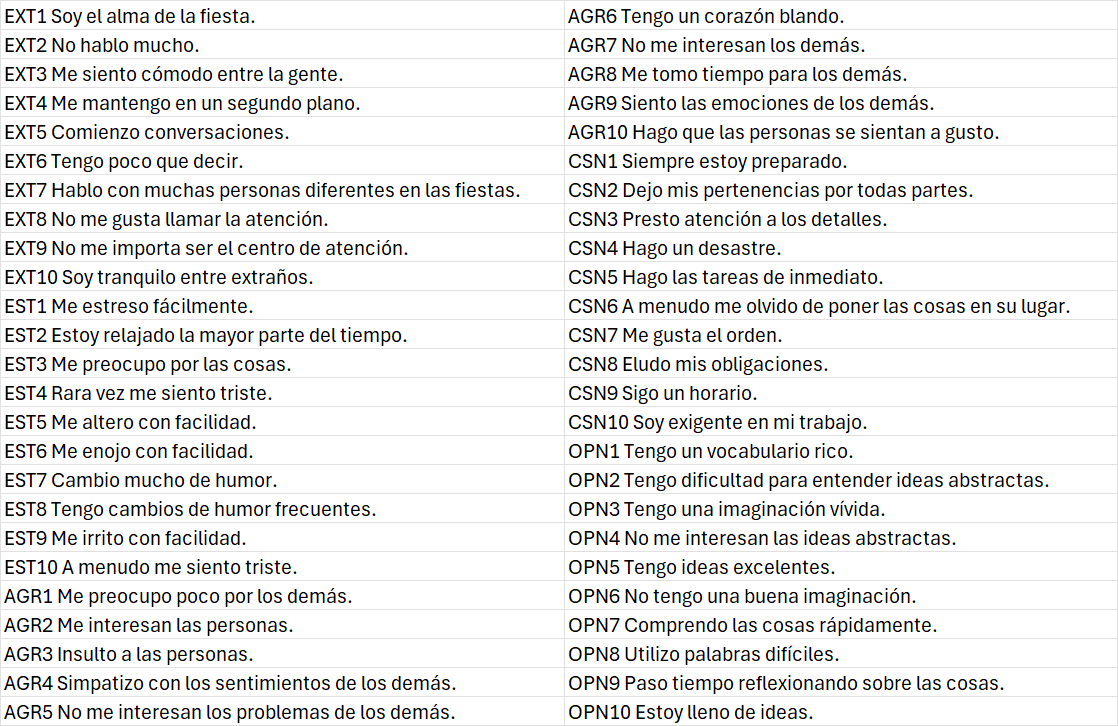

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

## ***Importamos y nos familiarizamos con los datos***

In [52]:
# cargamos los datos desde el archivo data-final.csv desde drive o github
PATH = 'https://raw.githubusercontent.com/josevallep1/Aprendizaje-no-supervisado/refs/heads/main/data-final.csv'
#PATH = 'https://drive.google.com/uc?id=1_SBbjrDkLL08CsJpfKgl7rMA3q4pF6AV'
# indicamos que el archivo esta separado por tabs
data = pd.read_csv(PATH, sep='\t')

In [53]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,3,1,4,3,4,1,3,3,5,3,...,2017-01-03 13:38:29,1366,768,21,293,12,17,US,47.5839,-122.2995
1,1,3,4,4,4,2,0,5,2,2,...,2017-01-03 13:38:32,1707,1365,10,876,14,1,US,42.403,-71.259
2,3,4,3,3,3,3,3,2,3,4,...,2017-01-03 13:38:42,1366,768,67,874,13,235,US,47.3927,-122.0464
3,3,3,5,0,5,1,5,3,4,2,...,2017-01-03 13:38:44,768,1024,2,234,14,1,CA,50.4722,-104.6828
4,2,2,3,4,1,1,1,3,4,5,...,2017-01-03 13:38:47,1366,768,12,298,24,15,US,47.3927,-122.0464


In [54]:
nRow, nCol = data.shape
# imprimimos el numero de filas y columnas que tiene nuestro set de datos
print(f'Hay {nRow} Filas y {nCol} Columnas')

Hay 239359 Filas y 110 Columnas


## ***Limpieza de datos:***

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239359 entries, 0 to 239358
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: int64(106), object(4)
memory usage: 200.9+ MB


In [56]:
# eliminamos las columnas 50 hasta la 107, ya que son datos que no nos son útiles debido a que almacenan datos de error de cada una las variables anteriores
data.drop(data.columns[50:107], axis=1, inplace=True)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,3,1,4,3,4,1,3,3,5,3,...,2,5,1,4,3,5,5,US,47.5839,-122.2995
1,1,3,4,4,4,2,0,5,2,2,...,1,4,2,5,4,5,4,US,42.403,-71.259
2,3,4,3,3,3,3,3,2,3,4,...,3,2,2,3,3,4,4,US,47.3927,-122.0464
3,3,3,5,0,5,1,5,3,4,2,...,1,5,1,5,3,5,5,CA,50.4722,-104.6828
4,2,2,3,4,1,1,1,3,4,5,...,2,2,2,4,2,4,4,US,47.3927,-122.0464


In [57]:
# eliminamos datos como lat_appx_lots_of_err y long_appx_lots_of_err (que se refiere al a ubicación de latitud y longitud del usuario)
#ya que esta info no es muy precisa y no nos aporta como dato de la clusterzación que queremos hacer.
data.drop(data.columns[51:], axis=1, inplace=True)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,3,1,4,3,4,1,3,3,5,3,...,3,5,2,5,1,4,3,5,5,US
1,1,3,4,4,4,2,0,5,2,2,...,1,5,1,4,2,5,4,5,4,US
2,3,4,3,3,3,3,3,2,3,4,...,3,2,3,2,2,3,3,4,4,US
3,3,3,5,0,5,1,5,3,4,2,...,1,5,1,5,1,5,3,5,5,CA
4,2,2,3,4,1,1,1,3,4,5,...,2,4,2,2,2,4,2,4,4,US


In [58]:
# validamos que finalmente no tenemos valores nulos dentro de nuestra muestra
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239359 entries, 0 to 239358
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   EXT1     239359 non-null  int64 
 1   EXT2     239359 non-null  int64 
 2   EXT3     239359 non-null  int64 
 3   EXT4     239359 non-null  int64 
 4   EXT5     239359 non-null  int64 
 5   EXT6     239359 non-null  int64 
 6   EXT7     239359 non-null  int64 
 7   EXT8     239359 non-null  int64 
 8   EXT9     239359 non-null  int64 
 9   EXT10    239359 non-null  int64 
 10  EST1     239359 non-null  int64 
 11  EST2     239359 non-null  int64 
 12  EST3     239359 non-null  int64 
 13  EST4     239359 non-null  int64 
 14  EST5     239359 non-null  int64 
 15  EST6     239359 non-null  int64 
 16  EST7     239359 non-null  int64 
 17  EST8     239359 non-null  int64 
 18  EST9     239359 non-null  int64 
 19  EST10    239359 non-null  int64 
 20  AGR1     239359 non-null  int64 
 21  AGR2     2

In [59]:
# se validan valores nulos por columna
data.isnull().sum()

,0
EXT1,0
EXT2,0
EXT3,0
EXT4,0
EXT5,0
EXT6,0
EXT7,0
EXT8,0
EXT9,0
EXT10,0


In [60]:
print('la sumatoria de los valores faltantes es de: ', data.isnull().values.sum())
# eliminamos los valores faltantes e imprimimos el número de valores resultantes para trabajar con ellos
data.dropna(inplace=True)
print('Número de filas después de eliminar los valores faltantes: ', len(data))

la sumatoria de los valores faltantes es de:  21
Número de filas después de eliminar los valores faltantes:  239338


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239338 entries, 0 to 239358
Data columns (total 51 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   EXT1     239338 non-null  int64 
 1   EXT2     239338 non-null  int64 
 2   EXT3     239338 non-null  int64 
 3   EXT4     239338 non-null  int64 
 4   EXT5     239338 non-null  int64 
 5   EXT6     239338 non-null  int64 
 6   EXT7     239338 non-null  int64 
 7   EXT8     239338 non-null  int64 
 8   EXT9     239338 non-null  int64 
 9   EXT10    239338 non-null  int64 
 10  EST1     239338 non-null  int64 
 11  EST2     239338 non-null  int64 
 12  EST3     239338 non-null  int64 
 13  EST4     239338 non-null  int64 
 14  EST5     239338 non-null  int64 
 15  EST6     239338 non-null  int64 
 16  EST7     239338 non-null  int64 
 17  EST8     239338 non-null  int64 
 18  EST9     239338 non-null  int64 
 19  EST10    239338 non-null  int64 
 20  AGR1     239338 non-null  int64 
 21  AGR2     239338

In [62]:
# identificamos las variables finales que tenemos numéricas y categóricas
variables_numericas = [col for col in data.columns if data[col].dtype != object]
variables_categoricas = [col for col in data.columns if data[col].dtype == object]
print(f'Variables numericas: {variables_numericas}')
print(f'Variables Categoricas: {variables_categoricas}')

Variables numericas: ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']
Variables Categoricas: ['country']


In [63]:
# eliminamos la variable categorica country
data.drop('country', axis=1, inplace=True)

## ***Visualizacion de datos:***


In [64]:
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,...,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000,239338.000000
mean,2.673512,2.753420,3.310669,3.120495,3.290614,2.414301,2.799125,3.406475,2.946578,3.528591,...,3.579168,2.147465,3.981574,2.064269,3.777027,1.904950,3.933771,3.100816,4.069425,3.939822
std,1.281101,1.334185,1.229844,1.244664,1.286372,1.238665,1.412377,1.283331,1.354781,1.321000,...,1.175078,1.133854,1.109788,1.108641,1.007928,1.117842,1.029965,1.266630,1.072211,1.048923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [65]:
# validamos las columnas finales
data.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

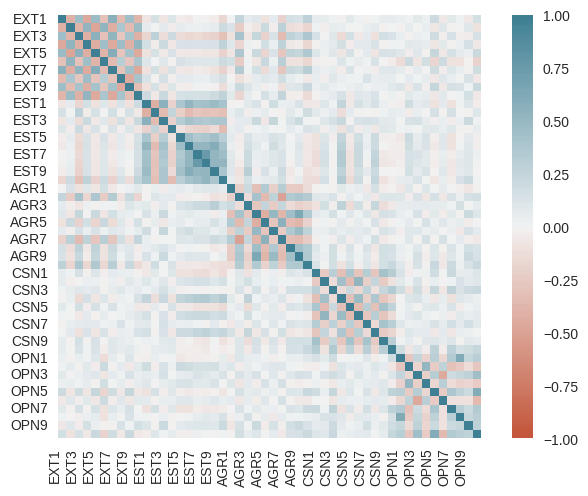

In [66]:
# generamos diagrama de correlacion lineal para validar el grado de relacion lineal de las valiables
# podemos definir que los datos estan distrobuidos de forma normal
corr = data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## ***Análisis de aprendizaje no supervisado:***
Utilizamos algoritmos de machine learning para analizar y agrupar en clústeres conjuntos de datos sin etiquetar. Estos algoritmos descubren agrupaciones de datos o patrones ocultos sin necesidad de ninguna intervención humana.

**Fuente:**
https://www.ibm.com/es-es/topics/unsupervised-learning

### ***1. K-Medias:***
Es un ejemplo común de un método de agrupación en clústeres exclusiva en el que los puntos de datos se asignan en K grupos, donde K representa el número de clústeres en función de la distancia desde el centroide de cada grupo.

**Fuente:**
https://www.ibm.com/es-es/topics/unsupervised-learning

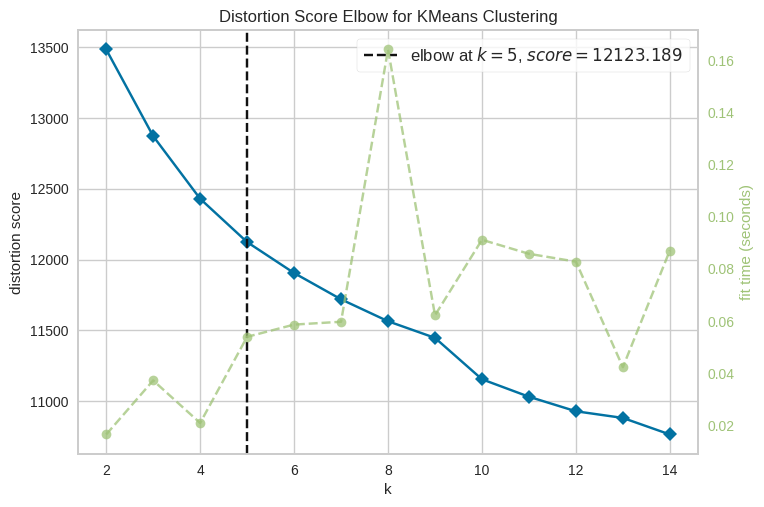

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
# vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo”
# para facilitar el cálculo, escalaremos todos los valores entre 0 y 1 y tomaremos una muestra de 5000
columns = list(data.columns)
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(data)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

# visualizamos el codo
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

Como puede ver, 5 grupos parecen óptimos para el conjunto de datos y ya sabemos que esta investigación es para identificar 5 personalidades diferentes.

In [68]:
# definimos la data del modelo
df_kmeans = data.copy()
# creamos el modelo K-means con 5 klusters
kmeans = KMeans(n_clusters=5)
# entrenar el modelo
kmeans.fit(df_kmeans)
# predecimos el clusters correspondiente a cada registro
kmeans_predictions = kmeans.predict(df_kmeans)
# creamos una columna con esta predicion
df_kmeans['kmeans_Clusters'] = kmeans_predictions
kmeans_clusters = np.unique(kmeans_predictions)
df_kmeans.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,kmeans_Clusters
0,3,1,4,3,4,1,3,3,5,3,...,3,5,2,5,1,4,3,5,5,4
1,1,3,4,4,4,2,0,5,2,2,...,1,5,1,4,2,5,4,5,4,3
2,3,4,3,3,3,3,3,2,3,4,...,3,2,3,2,2,3,3,4,4,3
3,3,3,5,0,5,1,5,3,4,2,...,1,5,1,5,1,5,3,5,5,4
4,2,2,3,4,1,1,1,3,4,5,...,2,4,2,2,2,4,2,4,4,1


In [69]:
# viasualizamos los valores por cada cluster
df_kmeans.kmeans_Clusters.value_counts()

,count
kmeans_Clusters,
0,55151
1,51062
4,48905
2,48125
3,36095


Este tipo de visualización es muy útil e informativa, sin embargo, solo es posible cuando se trabaja con dos dimensiones. Si los datos contienen más de dos variables (dimensiones), una posible solución es utilizar las dos primeras componentes principales obtenidas con un PCA previo.
### **PCA:**
El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

El método de PCA permite por lo tanto "condensar" la información aportada por múltiples variables en solo unas pocas componentes. Aun así, no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes. Dos de las principales aplicaciones del PCA son la visualización y el preprocesado de predictores previo ajuste de modelos supervisados.

**Fuente:**
https://cienciadedatos.net/documentos/py19-pca-python


In [70]:
# para poder visualizar en gráfico 2D usamos PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_kmeans)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = kmeans_predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-3.023013,0.482362,4
1,1.650460,1.265197,3
2,0.459188,2.151606,3
3,-7.383729,0.221337,4
4,2.036551,-0.153688,1


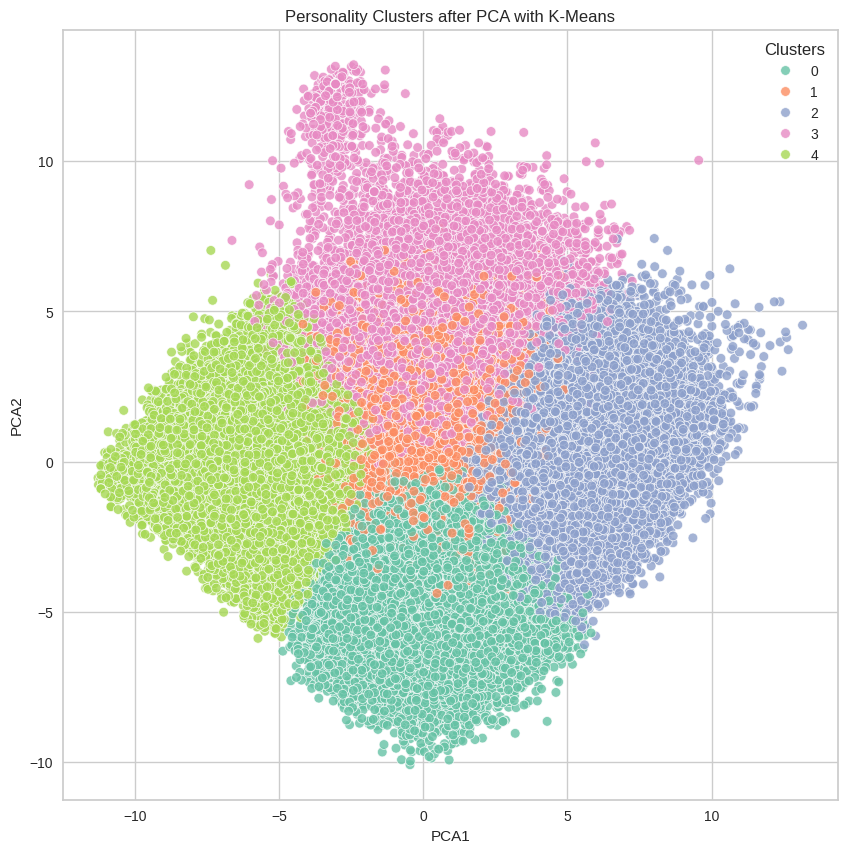

In [71]:
# graficamos
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA with K-Means');

### ***2. DBSCAN:***
es un algoritmo de aprendizaje automático que se utiliza para agrupar datos en regiones de alta densidad separadas por regiones de baja densidad. Es un método de agrupamiento no supervisado que se utiliza en la creación de modelos y algoritmos de aprendizaje automático.

In [72]:
# definimos la data del modelo (el algoritmo DBSCAN, no nos permite analizar el
#numero de registros que hay en el DF, por esto tomamos solo una muetra de 50 mil para generar el modelo sin que este genere un error de ejecución )
df_dbscan = data[:50000]
# creamos el modelo dbscan
dbscan = DBSCAN(eps=1, min_samples=5)
# entrenar el modelo
dbscan.fit(df_dbscan)
# predecimos el clusters correspondiente a cada dato
dbscan_predictions = dbscan.fit_predict(df_dbscan)
# creamos una columna con esta predicion
df_dbscan['dbscan_Clusters'] = dbscan_predictions
dbscan_clusters = np.unique(dbscan_predictions)
df_dbscan.head()

<ipython-input-72-47d604956030>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan['dbscan_Clusters'] = dbscan_predictions


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dbscan_Clusters
0,3,1,4,3,4,1,3,3,5,3,...,3,5,2,5,1,4,3,5,5,-1
1,1,3,4,4,4,2,0,5,2,2,...,1,5,1,4,2,5,4,5,4,-1
2,3,4,3,3,3,3,3,2,3,4,...,3,2,3,2,2,3,3,4,4,-1
3,3,3,5,0,5,1,5,3,4,2,...,1,5,1,5,1,5,3,5,5,-1
4,2,2,3,4,1,1,1,3,4,5,...,2,4,2,2,2,4,2,4,4,-1


In [73]:
# viasualizamos los valores por cada cluster
df_dbscan.dbscan_Clusters.value_counts()

,count
dbscan_Clusters,
-1,49767
0,135
1,42
2,29
3,21
4,6


In [74]:
# para poder visualizar en gráfico 2D usamos PCA
pca2 = PCA(n_components=2)
pca2_fit = pca2.fit_transform(df_dbscan)

df_pca2 = pd.DataFrame(data=pca2_fit, columns=['PCA1', 'PCA2'])
df_pca2['dbscan_Clusters'] = dbscan_predictions
df_pca2.head()

,PCA1,PCA2,dbscan_Clusters
0,2.441521,-0.049508,-1
1,-2.186710,-0.434742,-1
2,-1.043363,-1.817374,-1
3,6.951137,-0.467245,-1
4,-1.984423,0.023466,-1


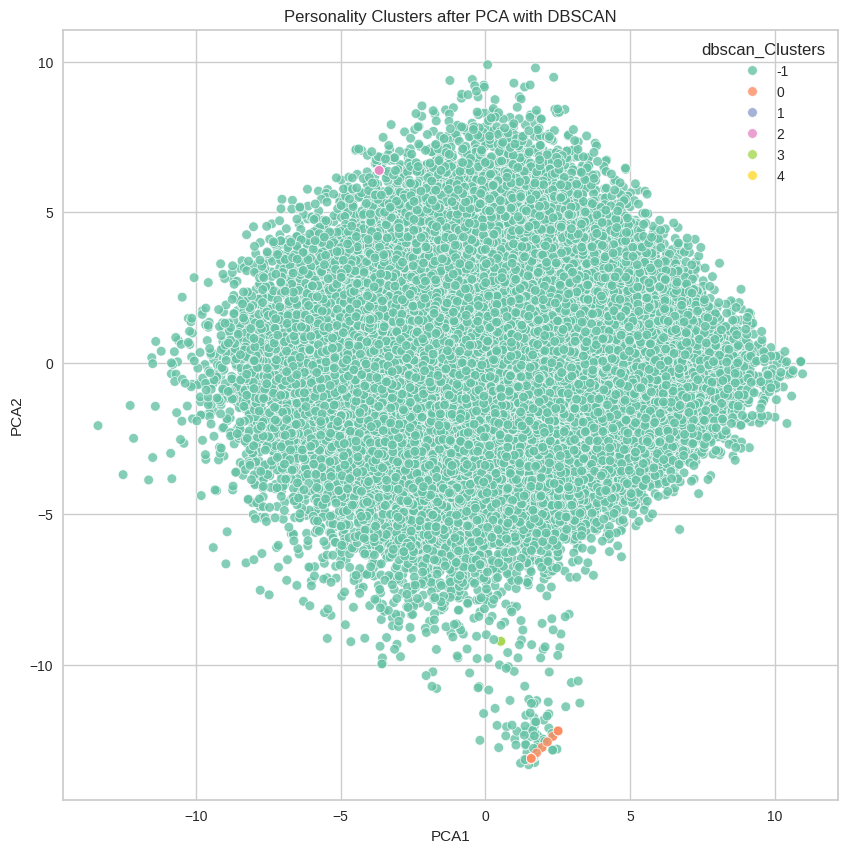

In [75]:
# graficamos
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca2, x='PCA1', y='PCA2', hue='dbscan_Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA with DBSCAN');